In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from scipy import sparse

import surprise
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os

In [2]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , merge
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau


from keras.layers.merge import dot
from keras.models import Model

Using TensorFlow backend.


In [3]:
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG

In [4]:
data1= pd.read_csv('UserInteractionV1.csv')

In [5]:
new = data1[['user_id','book_id','rating']]

In [6]:
new = new.loc[:, ~new.columns.str.contains('^Unnamed')]

In [7]:
users = new.user_id.unique()
Books = new.book_id.unique()

userid2idx = {o:i for i,o in enumerate(users)}
Bookid2idx = {o:i for i,o in enumerate(Books)}

In [8]:
n_latent_factors=50

In [9]:
new['user_id'] = new['user_id'].apply(lambda x: userid2idx[x])
new['book_id'] = new['book_id'].apply(lambda x: Bookid2idx[x])
split = np.random.rand(len(new)) < 0.8
train = new[split]
valid = new[~split]
print(train.shape , valid.shape)

(892345, 3) (222454, 3)


In [10]:
train.head(10)

,user_id,book_id,rating
0,0,0,5
1,1,0,5
2,2,0,5
3,3,0,5
4,4,0,5
6,6,0,5
8,8,0,4
9,9,0,5
10,10,0,5
11,11,0,5


In [11]:
n_book=len(new['book_id'].unique())
n_users=len(new['user_id'].unique())

In [12]:
user_input=Input(shape=(1,),name='user_input',dtype='int64')
user_embedding=Embedding(n_users,n_latent_factors,name='user_embedding')(user_input)
user_vec=Flatten(name='FlattenUsers')(user_embedding)
user_vec=Dropout(0.40)(user_vec)

In [13]:
book_input=Input(shape=(1,),name='Book_input',dtype='int64')
book_embedding=Embedding(n_book,n_latent_factors,name='book_embedding')(book_input)
book_vec=Flatten(name='FlattenBooks')(book_embedding)
book_vec=Dropout(0.40)(book_vec)

In [14]:
sim=dot([user_vec,book_vec],name='Simalarity-Dot-Product',axes=1)

In [15]:
nn_inp=Dense(96,activation='relu')(sim)
nn_inp=Dropout(0.4)(nn_inp)
# nn_inp=BatchNormalization()(nn_inp)
nn_inp=Dense(1,activation='relu')(nn_inp)
nn_model =keras.models.Model([user_input, book_input],nn_inp)
nn_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Book_input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        934400      user_input[0][0]                 
__________________________________________________________________________________________________
book_embedding (Embedding)      (None, 1, 50)        964650      Book_input[0][0]                 
____________________________________________________________________________________________

In [16]:
nn_model.compile(optimizer=Adam(lr=1e-3),loss='mse')

In [17]:
batch_size=128
epochs=1

In [25]:
History = nn_model.fit([train.user_id,train.book_id],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.book_id],valid.rating),
                              verbose = 1)

Train on 891961 samples, validate on 222838 samples
Epoch 1/1
891961/891961 [==============================] - 65s 72us/step - loss: 1.8703 - val_loss: 1.5751


In [37]:
History = nn_model.fit([train.user_id,train.book_id],train.rating, batch_size=batch_size,
                              epochs =epochs, validation_data = ([valid.user_id,valid.book_id],valid.rating),
                              verbose = 1)

Train on 891058 samples, validate on 223741 samples
Epoch 1/10
891058/891058 [==============================] - 70s 78us/step - loss: 0.9073 - val_loss: 1.2784
Epoch 2/10
891058/891058 [==============================] - 71s 79us/step - loss: 0.8913 - val_loss: 1.2744
Epoch 3/10
891058/891058 [==============================] - 70s 79us/step - loss: 0.8810 - val_loss: 1.2740
Epoch 4/10
891058/891058 [==============================] - 71s 80us/step - loss: 0.8692 - val_loss: 1.2644
Epoch 5/10
891058/891058 [==============================] - 67s 75us/step - loss: 0.8618 - val_loss: 1.2660
Epoch 6/10
891058/891058 [==============================] - 69s 77us/step - loss: 0.8478 - val_loss: 1.2608
Epoch 7/10
891058/891058 [==============================] - 64s 72us/step - loss: 0.8429 - val_loss: 1.2650
Epoch 8/10
891058/891058 [==============================] - 66s 74us/step - loss: 0.8311 - val_loss: 1.2613
Epoch 9/10
891058/891058 [==============================] - 66s 74us/step - loss: 0.

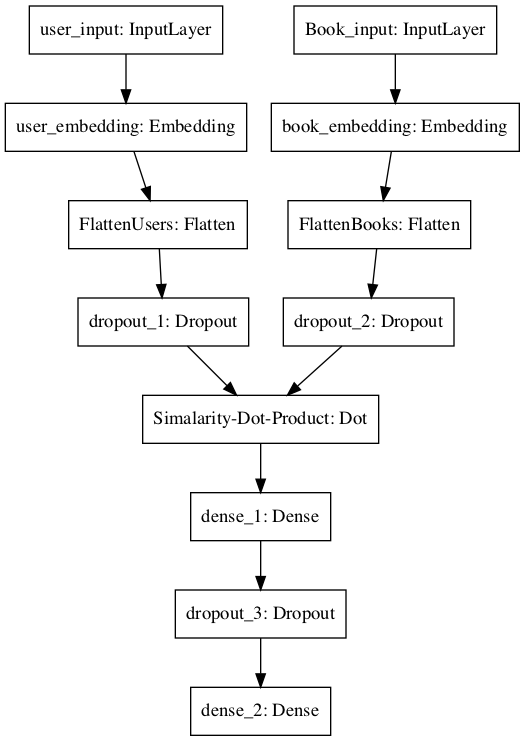

In [18]:
from keras.utils import plot_model
plot_model(nn_model, to_file='model.png')